<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/Study_Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('score.csv')

**Exploratory data analysis**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isna().mean()

Hours     0.0
Scores    0.0
dtype: float64

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

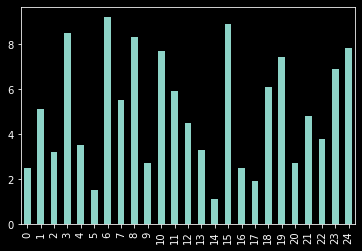

In [8]:
df['Hours'].plot(kind='bar')

In [9]:
X = df.drop(columns = ['Scores'], axis = 1)
y = df.drop(columns = ['Hours'], axis = 1)

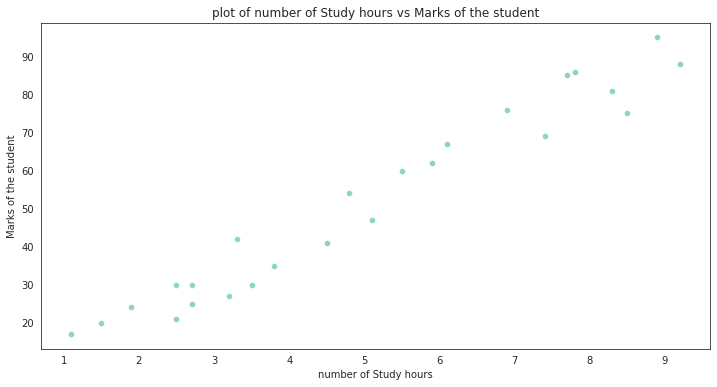

In [23]:
plt.figure(figsize = (12, 6))
sns.set_style("white")
sns.scatterplot(x = df['Hours'], y = df['Scores'])
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student");

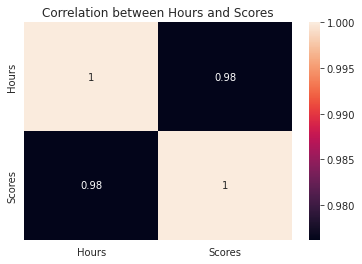

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between Hours and Scores");

**Modelling**

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train) + len(X_test) == len(df)

True

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [[9.68207815]]
Intercept of the model:  [2.82689235]


In [16]:
y_pred = model.predict(X_train)

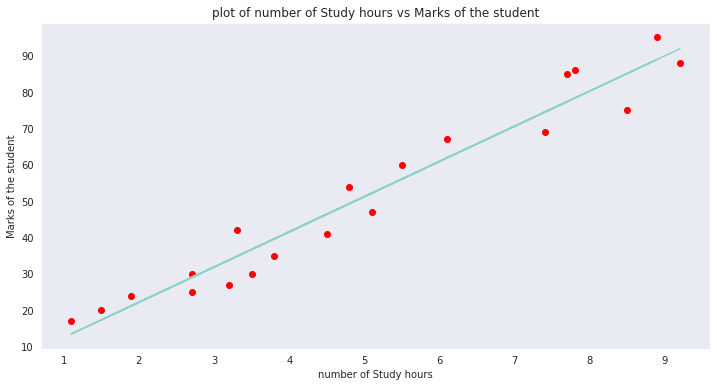

In [17]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred)
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student");

In [18]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Marks')

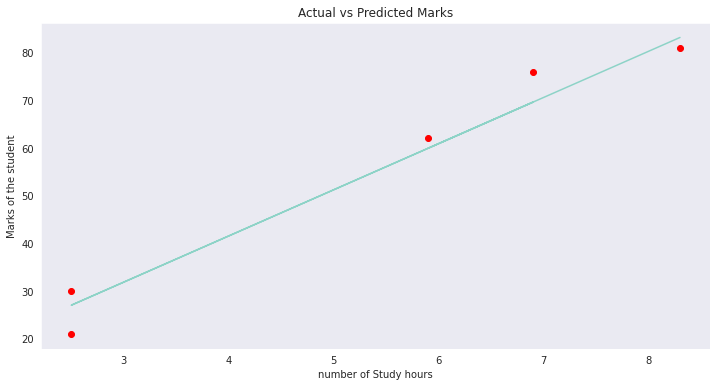

In [19]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred)
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("Actual vs Predicted Marks")

**Accuracy**

In [20]:
acc = model.score(X_test, y_test)
print("Accuracy: ", round(acc*100, 2))
print("MAE:      ",round(mean_absolute_error(y_test,y_pred), 2))
print("MSE:      ",round(mean_squared_error(y_test,y_pred), 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,y_pred)), 2))
print("R2 score: ", round(r2_score(y_test,y_pred), 2))

Accuracy:  96.78
MAE:       3.92
MSE:       18.94
RMSE:      4.35
R2 score:  0.97


In [28]:
print("Marks of student who studied 9.25 hours a day:  ", model.predict([[9.25]]));

Marks of student who studied 9.25 hours a day:   [[92.38611528]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
